# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Septi Aulia Putri
- **Email:** septiauliaputri33@gmail.com
- **ID Dicoding:** putri33

## Menentukan Pertanyaan Bisnis

- Tahun manakah yang memiliki rata-rata tingkat polusi tertinggi kombinasi NO2, SO2, dan PM2.5? Bagaimana juga penyebaran polutan-polutan ini setiap tahunnya?
- Apakah terdapat hubungan antara suhu dan konsentrasi polutan NO2, SO2, dan PM2.5? Apakah ada pengaruhnya juga di bulan-bulan tertentu?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**1. Memuat data CSV PRSA Tainan.**




In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")

In [ ]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- Identifikasi data dengan format .csv
- Diketahui struktur data nya meliputi kolom **year, month, day, dan hour** yang menunjukkan waktu pengukuran. Untuk analisis kualitas udara, terdapat kolom **PM2.5, PM10, SO2, NO2, CO, dan O3**, yang masing-masing mencerminkan tingkat polusi dari berbagai jenis partikel dan gas. Selain itu, kolom **TEMP** menunjukkan suhu lingkungan, **PRES** mencatat tekanan atmosfer, dan **DEWP** memberikan informasi tentang titik embun. Data curah hujan dicatat dalam kolom **RAIN**, sementara kolom **wd** dan **WSPM** merekam arah dan kecepatan angin. Terakhir, kolom **station** menunjukkan nama stasiun pengukuran yaitu Tiantan.

### Assessing Data

**1. Menilai data yang sudah dimuat**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


In [ ]:
print('Jumlah Duplikasi Data: ', data.duplicated().sum())

Jumlah Duplikasi Data:  0


**Insight:**

- Semua kolom memiliki tipe data yang sesuai, dengan mayoritas berisi data numerik dan beberapa kolom kategori.
- Terdapat sejumlah missing value pada beberapa kolom, yaitu: **PM2.5** (677), **PM10** (597), **SO2** (1118), **NO2** (744), **CO** (1126), **O3** (843), **TEMP** (20), **PRES** (20), **DEWP** (20), **RAIN** (20), **wd** (78), dan **WSPM** (14).
- Tidak ditemukan data duplikat dalam dataset.


### Cleaning Data

**1. Mengisi missing value**

In [ ]:
data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].median())
data['PM10'] = data['PM10'].fillna(data['PM10'].median())
data['SO2'] = data['SO2'].fillna(data['SO2'].median())
data['NO2'] = data['NO2'].fillna(data['NO2'].median())
data['CO'] = data['CO'].fillna(data['CO'].median())
data['O3'] = data['O3'].fillna(data['O3'].median())
data['TEMP'] = data['TEMP'].fillna(data['TEMP'].median())
data['PRES'] = data['PRES'].fillna(data['PRES'].median())
data['DEWP'] = data['DEWP'].fillna(data['DEWP'].median())
data['RAIN'] = data['RAIN'].fillna(data['RAIN'].median())
data['wd'] = data['wd'].fillna(data['wd'].mode()[0])
data['WSPM'] = data['WSPM'].fillna(data['WSPM'].median())


**Insight:**
- Alasan untuk mengisi missing value dalam dataset polusi udara dengan median adalah karena median lebih tahan terhadap outlier. Dalam dataset ini, nilai-nilai value sangat bervariasi, dan jika ada beberapa nilai yang sangat tinggi (outlier), menggunakan median dapat memberikan gambaran yang lebih baik tentang kondisi polusi secara keseluruhan. Median juga membantu menjaga kestabilan data dan tidak terpengaruh oleh nilai ekstrem yang dapat merusak analisis.

## Exploratory Data Analysis (EDA)

**1. Rangkuman descriptive statistics data**

In [ ]:
data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,81.717653,105.999934,14.132702,53.031884,1285.512720,55.600006,13.672019,1012.547221,2.447850,0.063983,NaN,1.860641,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.199730,88.976174,19.863093,31.617950,1153.782826,58.418310,11.455171,10.263134,13.806763,0.786059,NaN,1.280133,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,41.000000,3.000000,29.000000,600.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,143.000000,16.000000,70.000000,1600.000000,79.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


**Insight**

- Data sudah lengkap dengan total 35.064 data
- Untuk data tahun, bulan, hari, dan jam sudah dalam range yang benar (tahun = 2013-2017, bulan = 1-12, hari = 1-31, jam = 0-23)
- Untuk data polutan dan faktor lingkungan lainnya dapat dilihat jika valuenya sangat beragam

**2. Melihat konsentrasi polutan NO2, SO2, dan PM2.5 dari tahun ke tahun**

In [ ]:
NO2_pollution = data.groupby('year')[['NO2']].agg(['mean', 'min', 'max'])
SO2_pollution = data.groupby('year')[['SO2']].agg(['mean', 'min', 'max'])
PM25_pollution = data.groupby('year')[['PM2.5']].agg(['mean', 'min', 'max'])

print(NO2_pollution)
print(SO2_pollution)
print(PM25_pollution)

            NO2            
           mean  min    max
year                       
2013  53.287145  2.0  230.0
2014  55.295034  2.0  192.0
2015  51.841062  3.0  218.0
2016  50.021972  2.0  238.0
2017  63.745763  2.0  241.0
            SO2               
           mean     min    max
year                          
2013  18.160085  0.5712  202.0
2014  18.369886  1.0000  273.0
2015  11.779247  2.0000  227.0
2016   8.923383  2.0000  182.0
2017  13.906780  1.0000  111.0
          PM2.5            
           mean  min    max
year                       
2013  83.144063  3.0  525.0
2014  85.478470  3.0  541.0
2015  82.193082  3.0  671.0
2016  73.703097  3.0  821.0
2017  97.829802  3.0  808.0


**Insight**
- NO2 dan PM2.5 menunjukkan tren peningkatan di tahun 2017, menandakan masalah kualitas udara yang semakin buruk.
- SO2 mengalami penurunan pada 2016, namun kembali sedikit meningkat di tahun 2017.

**3. Melihat kombinasi total polusi dari polutan NO2, SO2, dan PM2.5 setiap tahunnya**

In [ ]:
yearly_pollution = data.groupby('year')[['NO2', 'SO2', 'PM2.5']].mean()
yearly_pollution['total_pollution'] = yearly_pollution[['NO2', 'SO2', 'PM2.5']].apply(lambda x: x.sum(), axis=1)

In [ ]:
sorted_yearly_pollution = yearly_pollution.sort_values(by='total_pollution', ascending=False)
print(sorted_yearly_pollution['total_pollution'])

year
2017    175.482345
2014    159.143390
2013    154.591293
2015    145.813390
2016    132.648452
Name: total_pollution, dtype: float64


**Insight**
- Tahun 2017 memiliki total rata-rata polusi tertinggi dengan nilai mencapai  175.482345

**4. Melihat rata-rata bulanan suhu dan polutan NO2,S02, dan PM2.5**

**5. Mengubah value kolom bulan agar lebih mudah dibaca**

In [ ]:
monthly_avg = data.groupby('month').agg({
    'TEMP': 'mean',
    'NO2': 'mean',
    'SO2': 'mean',
    'PM2.5': 'mean'
}).reset_index()

month_names = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

monthly_avg['month'] = monthly_avg['month'].map(month_names)
print(monthly_avg)

        month       TEMP        NO2        SO2       PM2.5
0     Januari  -1.716067  67.883569  27.119019   98.059073
1    Februari   1.217238  53.083702  23.360988   86.619469
2       Maret   8.439468  60.299350  26.329717   94.097984
3       April  15.439931  46.691985  14.317203   70.639583
4         Mei  21.709039  41.675470  14.100806   61.883905
5        Juni  24.700243  41.911826   9.078323   73.989583
6        Juli  27.438340  38.511730   5.964448   74.284610
7     Agustus  26.916801  39.343431   5.115619   56.720128
8   September  20.998728  50.880120   6.979958   63.470486
9     Oktober  13.553009  61.596959   8.230166   90.054099
10   November   4.763090  62.070729  10.927778   97.312847
11   Desember  -0.138710  72.097279  18.395826  113.222715


**Insight**
- Suhu terendah rata-rata tercatat pada bulan Januari, sementara suhu tertinggi terjadi pada bulan Juli.
- Konsentrasi NO2 tertinggi terjadi di bulan Januari, dengan penurunan signifikan hingga Agustus, lalu meningkat lagi menjelang akhir tahun.
- SO2 juga puncaknya di bulan Januari dan mencapai nilai terendah pada bulan Agustus.
- PM2.5 mencapai puncaknya di bulan Desember

**6. Melihat korelasi antara suhu dan polutan**

In [ ]:
correlation_matrix = monthly_avg[['TEMP', 'NO2', 'SO2', 'PM2.5']].corr()
print("\nKorelasi antara Suhu dan Polutan:")
print(correlation_matrix)


Korelasi antara Suhu dan Polutan:
           TEMP       NO2       SO2     PM2.5
TEMP   1.000000 -0.888390 -0.790392 -0.857062
NO2   -0.888390  1.000000  0.588576  0.904955
SO2   -0.790392  0.588576  1.000000  0.591311
PM2.5 -0.857062  0.904955  0.591311  1.000000


**Insight:**
- Korelasi negatif antara TEMP dan semua polutan
- Korelasi positif antara NO2 dan PM2.5

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tahun manakah yang memiliki rata-rata tingkat polusi tertinggi kombinasi NO2, SO2, dan PM2.5? Bagaimana juga penyebaran polutan-polutan ini setiap tahunnya?

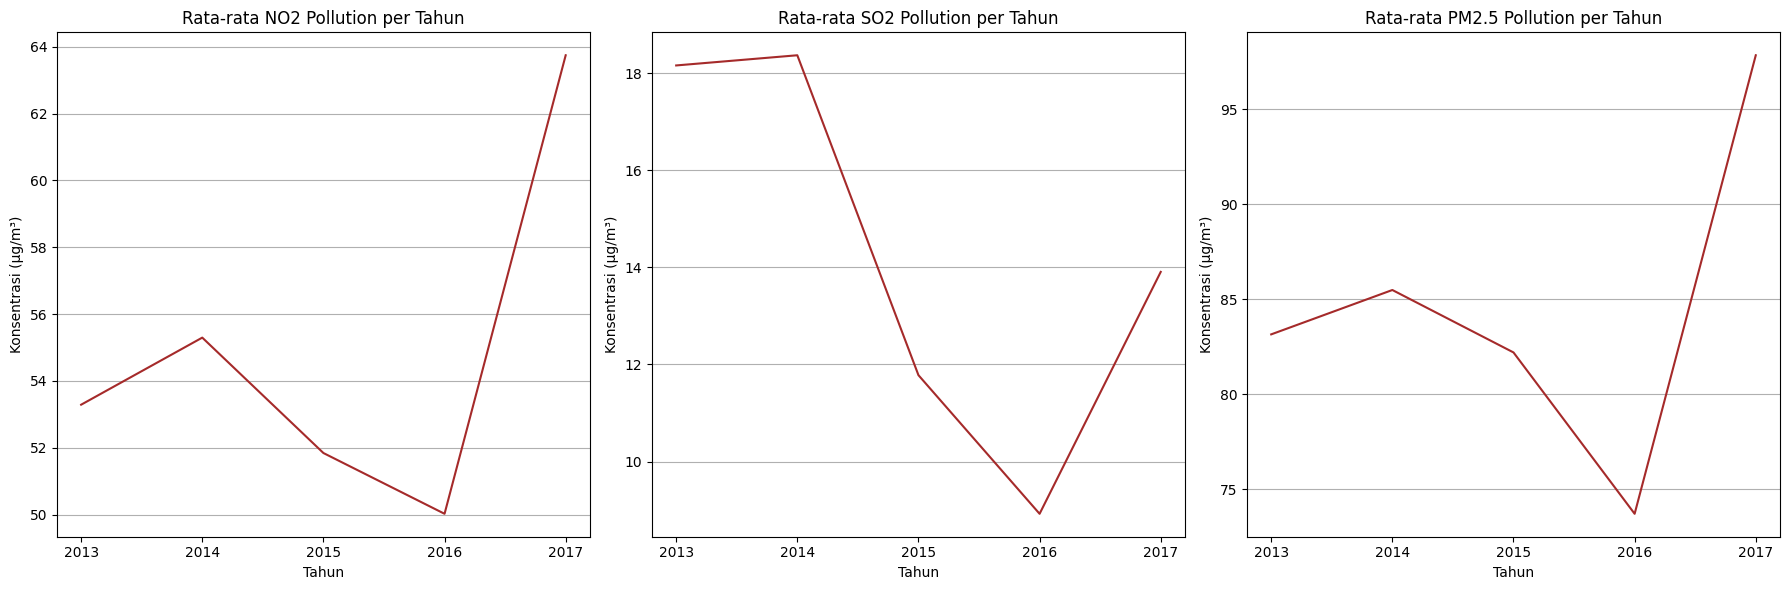

In [ ]:
pollution_data = {
    'NO2': NO2_pollution['NO2']['mean'],
    'SO2': SO2_pollution['SO2']['mean'],
    'PM2.5': PM25_pollution['PM2.5']['mean']
}

plt.figure(figsize=(18, 6))
for i, (pollutant, values) in enumerate(pollution_data.items(), start=1):
    plt.subplot(1, 3, i)
    plt.plot(values.index, values, color='brown')
    plt.title(f'Rata-rata {pollutant} Pollution per Tahun')
    plt.xlabel('Tahun')
    plt.ylabel('Konsentrasi (μg/m³)')
    plt.xticks(values.index)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

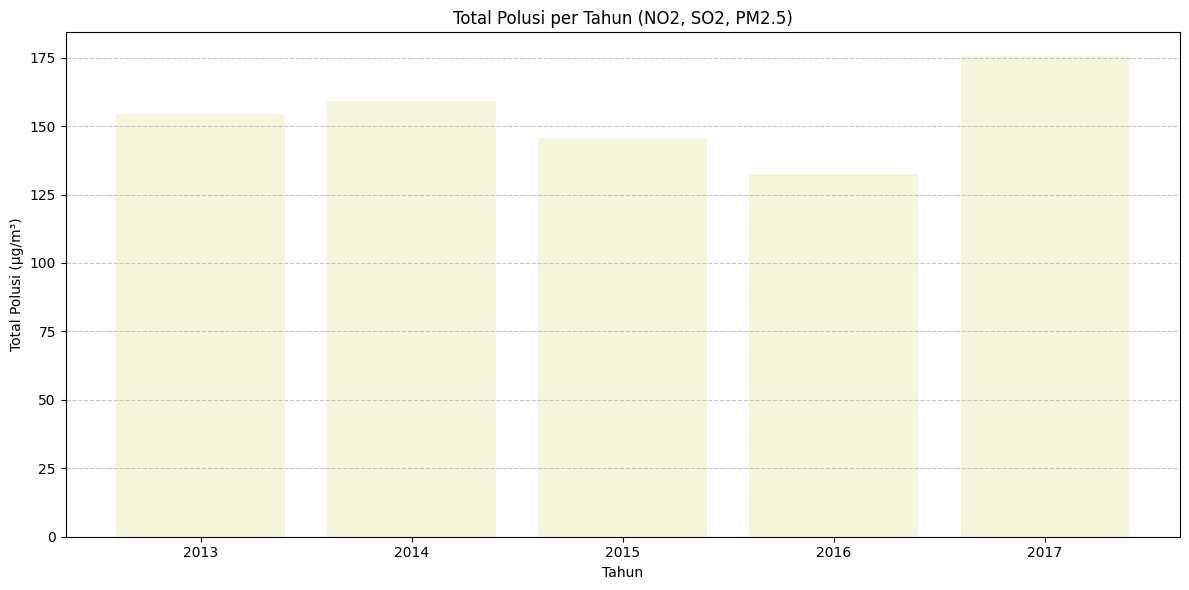

In [ ]:
plt.figure(figsize=(12, 6))

plt.bar(sorted_yearly_pollution.index, sorted_yearly_pollution['total_pollution'], color='beige')
plt.title('Total Polusi per Tahun (NO2, SO2, PM2.5)')
plt.xlabel('Tahun')
plt.ylabel('Total Polusi (μg/m³)')
plt.xticks(sorted_yearly_pollution.index)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

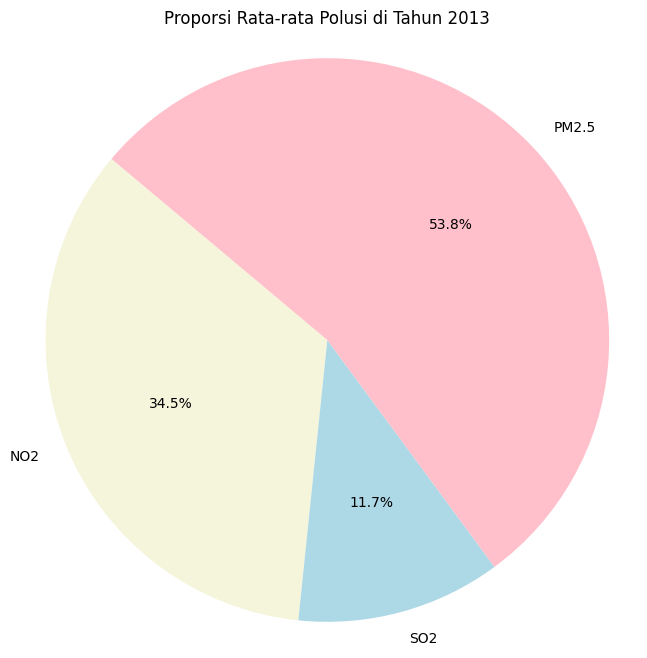

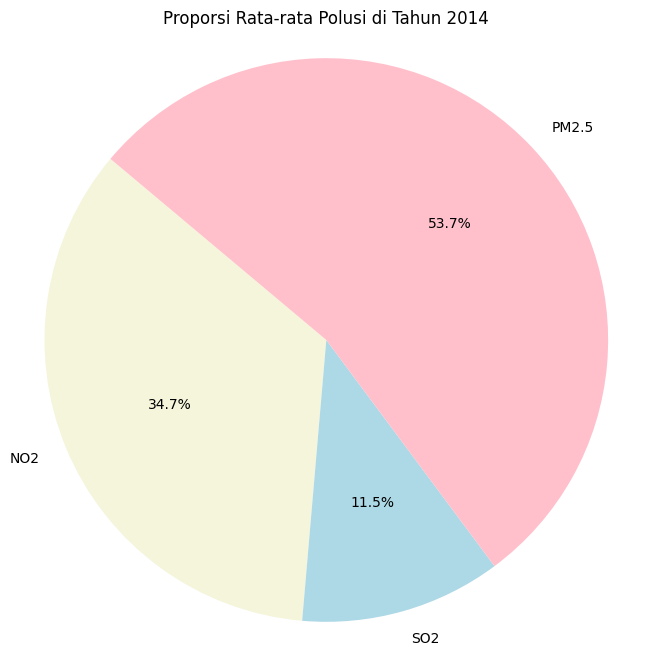

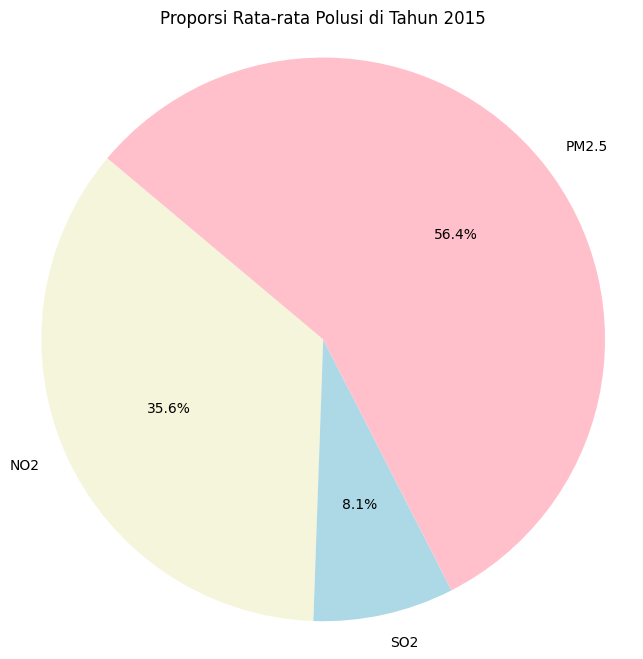

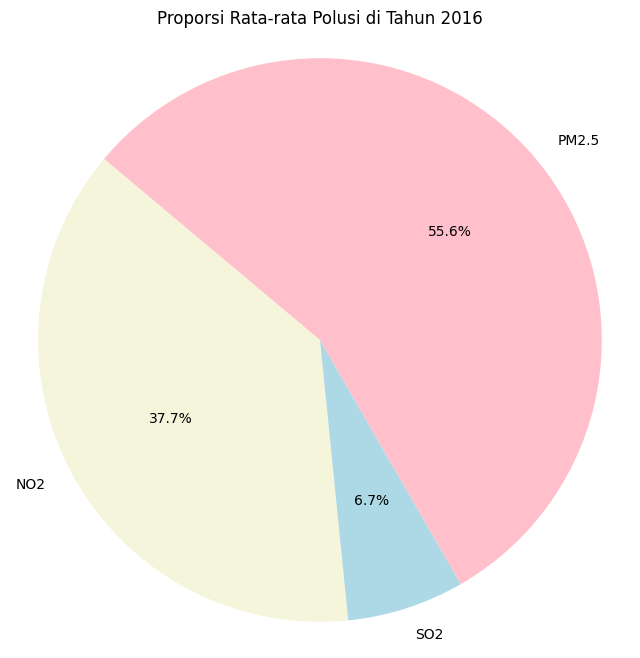

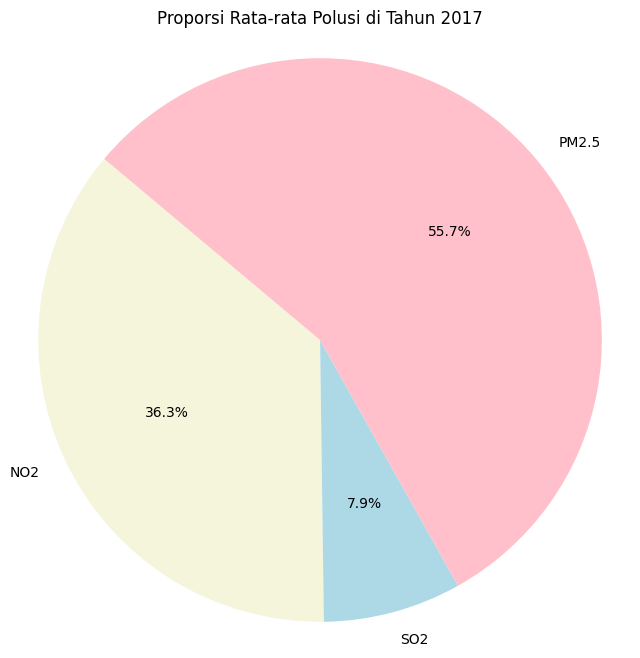

In [ ]:
for year in yearly_pollution.index:
    average_pollution = yearly_pollution.loc[year]

    plt.figure(figsize=(8, 8))
    plt.pie(average_pollution, labels=average_pollution.index, autopct='%1.1f%%', startangle=140, colors=['beige','lightblue','pink'])
    plt.title(f'Proporsi Rata-rata Polusi di Tahun {year}')
    plt.axis('equal')
    plt.show()


### Pertanyaan 2: Apakah terdapat hubungan antara suhu dan konsentrasi polutan NO2, SO2, dan PM2.5? Apakah ada pengaruhnya juga di bulan-bulan tertentu?

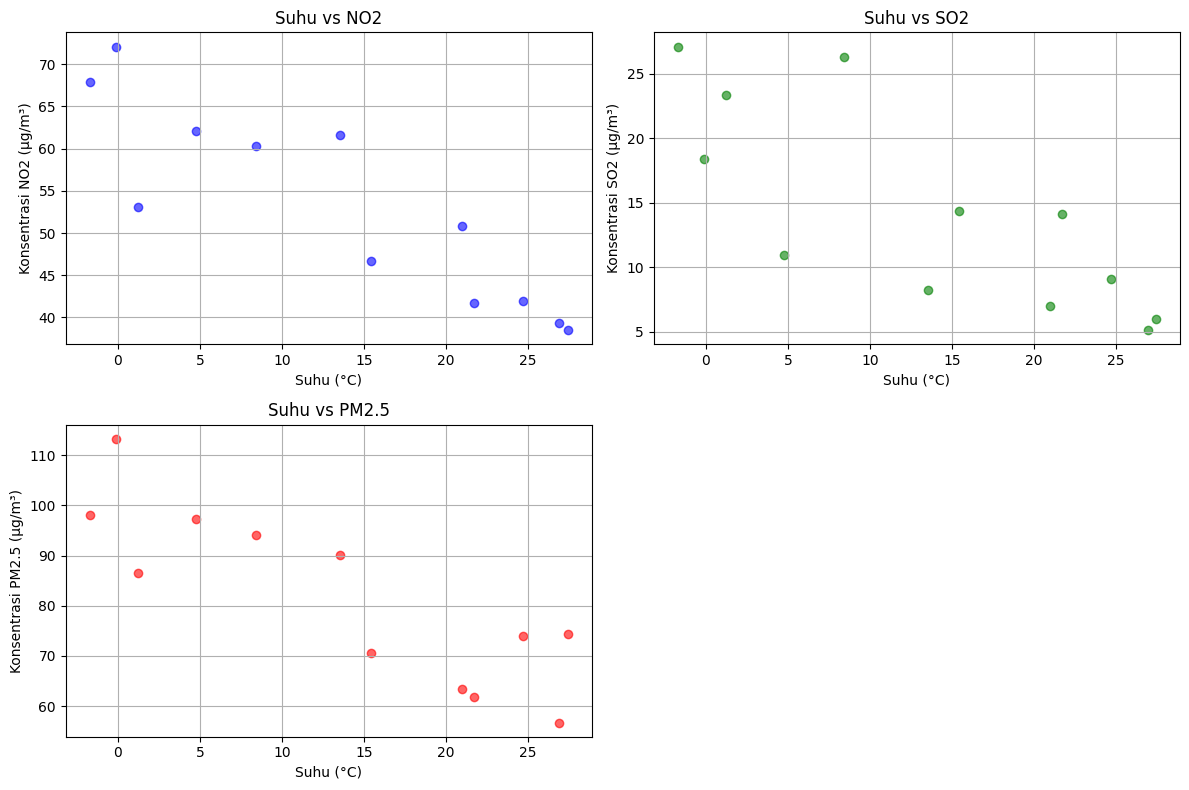

In [ ]:
plt.figure(figsize=(12, 8))

# Scatter plot untuk Suhu vs NO2
plt.subplot(2, 2, 1)
plt.scatter(monthly_avg['TEMP'], monthly_avg['NO2'], color='beige', alpha=0.6)
plt.title('Suhu vs NO2')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi NO2 (μg/m³)')
plt.grid()

# Scatter plot untuk Suhu vs SO2
plt.subplot(2, 2, 2)
plt.scatter(monthly_avg['TEMP'], monthly_avg['SO2'], color='lightblue', alpha=0.6)
plt.title('Suhu vs SO2')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi SO2 (μg/m³)')
plt.grid()

# Scatter plot untuk Suhu vs PM2.5
plt.subplot(2, 2, 3)
plt.scatter(monthly_avg['TEMP'], monthly_avg['PM2.5'], color='pink', alpha=0.6)
plt.title('Suhu vs PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi PM2.5 (μg/m³)')
plt.grid()

# Menampilkan plot
plt.tight_layout()
plt.show()



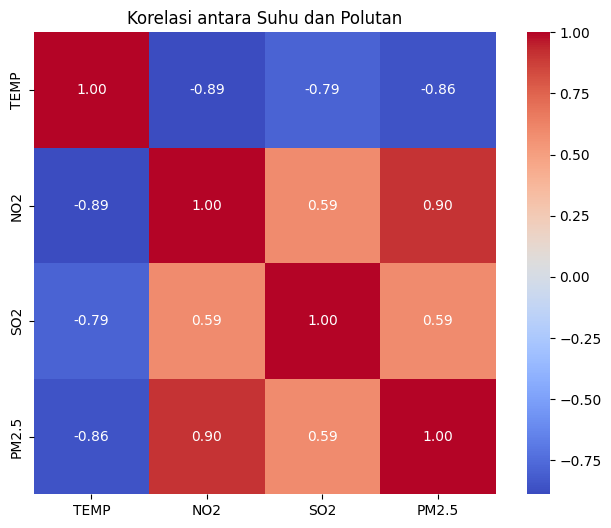

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Korelasi antara Suhu dan Polutan')
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
    Tahun 2017 memiliki rata-rata tingkat polusi tertinggi dengan total polutan mencapai 175.48 μg/m³ untuk kombinasi polutan NO2, SO2, dan PM2.5. Polutan PM2.5 mendominasi penyebaran polutan dengan 97.82 μg/m³ pada tahun tersebut, yang mencapai 55.7% dari keseluruhan. Diikuti oleh NO2 dengan 63.74 μg/m³, berkontribusi sebesar 36.3% terhadap total polusi. Sebaliknya, SO2 menunjukkan penurunan sejak awal periode penelitian, hanya menyumbang 7.9% pada tahun 2017, seperti yang dibuktikan oleh grafik rata-rata polutan SO2. Hal ini menunjukkan adanya kesenjangan signifikan, dengan PM2.5 sebagai polutan utama di Tainan setiap tahunnya.

- Conclution pertanyaan 2 :
    Setelah dianalisa terdapat kecenderungan bahwa suhu berpengaruh terhadap konsentrasi polutan dan menariknya juga hubungan ini bervariasi tergantung pada bulan tertentu. Hasil visualisasi data dengan scatter plot dan heatmap korelasi sejalan membuktikan bahwa terdapat hubungan negatif yang kuat antara suhu dan semua polutan (NO2, SO2, PM2.5). Ini bisa menunjukkan bahwa pada bulan yang lebih hangat (suhu naik/meningkat) di Tainan, konsentrasi polutan cenderung lebih rendah.

**P.S**
Menyimpan berkas data yang telah dibersihkan

In [ ]:
data.to_csv('data_clean.csv', index=False)